# Data summary

Now that we have a procedure to normalize the data, we are able to combine all the experiments (done on different days, by different people, but with same grid design) into the same histogram. In this notebook, we first overview the compositions of the experimental data, then make the "ultimate" histogram of this project.

In [2]:
import os
import pandas as pd
from myimagelib.myImageLib import readdata
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d, uniform_filter1d
import numpy as np

## 0 Data overview

In this section, we provide an overview of the bifurcation data:

- how many experiments do we have?

In [3]:
main_folder = "/mnt"
a_folder = os.path.join(main_folder, "ASYMMETRIC")
s_folder = os.path.join(main_folder, "SYMMETRIC")

In [4]:
# days
asf = next(os.walk(a_folder))[1]
ssf = next(os.walk(s_folder))[1]
print("We have {0:d} days of symmetric experiments and {1:d} days of asymmetric experiments.".format(len(ssf), len(asf)))

We have 20 days of symmetric experiments and 13 days of asymmetric experiments.


In [5]:
# symmetric time
time_total = 0
for sf in ssf:
    flowrate_folder = os.path.join(s_folder, sf, "Flow_rate")
    l = readdata(flowrate_folder, "csv")
    time_in_day = 0
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        time_in_day += flowrate.t.max()
    print("{0:18}: {1:.2f} hrs".format(sf, time_in_day / 3600))
    time_total += time_in_day
print("{0:18}: {1:.2f} hrs".format("Total", time_total / 3600))

17 oct 2022       : 4.49 hrs
14 dec 2022       : 1.00 hrs
15 dec 2022       : 2.00 hrs
31 oct 2022       : 2.25 hrs
04 nov 2022       : 1.83 hrs
07 nov 2022       : 1.15 hrs
05_july_2022      : 1.33 hrs
17 jan 2023       : 1.00 hrs
22_january_2022   : 0.92 hrs
26_july_2022      : 1.25 hrs
19 jan 2023       : 3.50 hrs
31 jan 2023       : 3.00 hrs
01 feb 2023       : 4.08 hrs
28_december_2022  : 0.58 hrs
28 feb 2023       : 4.37 hrs
08 mar 2023       : 4.50 hrs
28 mar 2023       : 2.00 hrs
12 apr 2023       : 3.00 hrs
13 apr 2023       : 4.50 hrs
14 apr 2023       : 4.56 hrs
Total             : 51.29 hrs


In [6]:
# asymmetric time
time_total = 0
for sf in asf:
    flowrate_folder = os.path.join(a_folder, sf, "Flow_rate")
    l = readdata(flowrate_folder, "csv")
    time_in_day = 0
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        time_in_day += flowrate.t.max()
    print("{0:18}: {1:.2f} hrs".format(sf, time_in_day / 3600))
    time_total += time_in_day
print("{0:18}: {1:.2f} hrs".format("Total", time_total / 3600))

28_december_2022  : 0.67 hrs
20_july_2022      : 2.08 hrs
22_january_2022   : 0.83 hrs
10_july_2022_E1   : 0.80 hrs
10_july_2022_E2   : 1.03 hrs
07 feb 2023       : 4.17 hrs
08 feb 2023       : 7.00 hrs
10 feb 2023       : 2.50 hrs
23 feb 2023       : 2.70 hrs
24 feb 2023       : 3.31 hrs
01 mar 2023       : 1.50 hrs
02 mar 2023       : 5.50 hrs
03 mar 2023       : 6.00 hrs
Total             : 38.08 hrs


What does the channel design distribution look like?

In [10]:
data = pd.read_csv("/home/zhengyang/Downloads/List of experiments of Bifurcations - Feuille 1.csv")

Text(0.5, 0, 'duration (hours)')

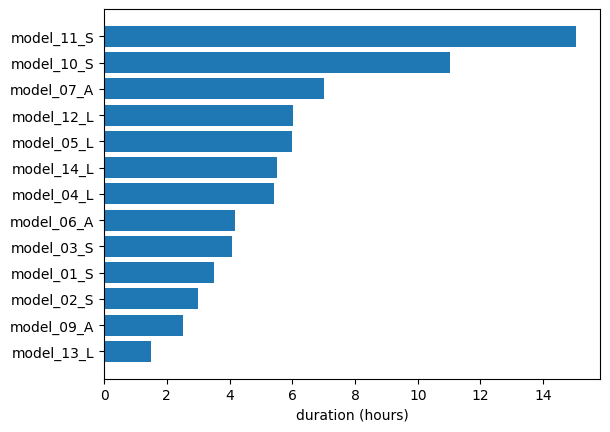

In [11]:
models = []
durations = []
for i, g in data.groupby("Grid model"):
    models.append(i)
    durations.append(g["Lifetime or experiment duration (hours)"].sum())
df = pd.DataFrame({"model": models, "duration": durations}).sort_values(by="duration")
plt.barh(df.model, df.duration)
plt.xlabel("duration (hours)")

## 1 model_01_S

We have two designs: disk-based and minimal, corresponding to model_01 and model_11. However, since the channel structures are exactly the same, we consider them the same model. The subfolders that are concerned in this section: ["05_july_2022, "04 nov 2022", "14 dec 2022", "15 dec 2022", "28_december_2022", "17 jan 2023", "19 jan 2023"].

Note: "04 nov 2022" and "17 jan 2023" were removed due to bad packing and low activity.

In [7]:
dates = ["14 dec 2022", "15 dec 2022", "19 jan 2023", "12 apr 2023", "13 apr 2023", "14 apr 2023"]
main_folder = "/mnt/bf/SYMMETRIC"

Some statistics.

In [8]:
# some statistics
window_size = 100
for date in dates:
    folder = os.path.join(main_folder, date, "Flow_rate")
    l = readdata(folder, "csv")
    total = 0
    fr_list = []
    count = 0
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir).dropna()
        flowrate["normalizer"] = uniform_filter1d(flowrate[flowrate.columns.drop("t")].abs().max(axis=1), size=window_size, axis=0)
        total += len(flowrate)
        fr_list.append(flowrate)
        combined = pd.concat(fr_list)
        nominal_flowrate = combined["normalizer"].mean()
        count += 1
    print("{0:18}: {1:2d} videos, {2:5d} points, {3:7.2f} um^2/s".format(date, count+1, total, nominal_flowrate))

14 dec 2022       :  3 videos,  7198 points,  220.29 um^2/s
15 dec 2022       :  5 videos, 14396 points,  494.38 um^2/s
19 jan 2023       :  8 videos, 25193 points,  278.95 um^2/s
12 apr 2023       :  6 videos, 17995 points,  511.97 um^2/s
13 apr 2023       : 10 videos, 32391 points,  780.16 um^2/s
14 apr 2023       : 11 videos, 32831 points,  469.37 um^2/s


### 1.1 3-panel histograms

We want to compare the flow histogram with theoretical energy landscapes. The predictions is conveniently visualized in 2D histograms. For our 3-channel bifurcation experiment, 3 histograms can be made, namely (A, B), (A, C) and (B, C). In this section, we implement the code that plot these 3 histograms in 3 panels. We term this type of visualization "3-panel histograms".


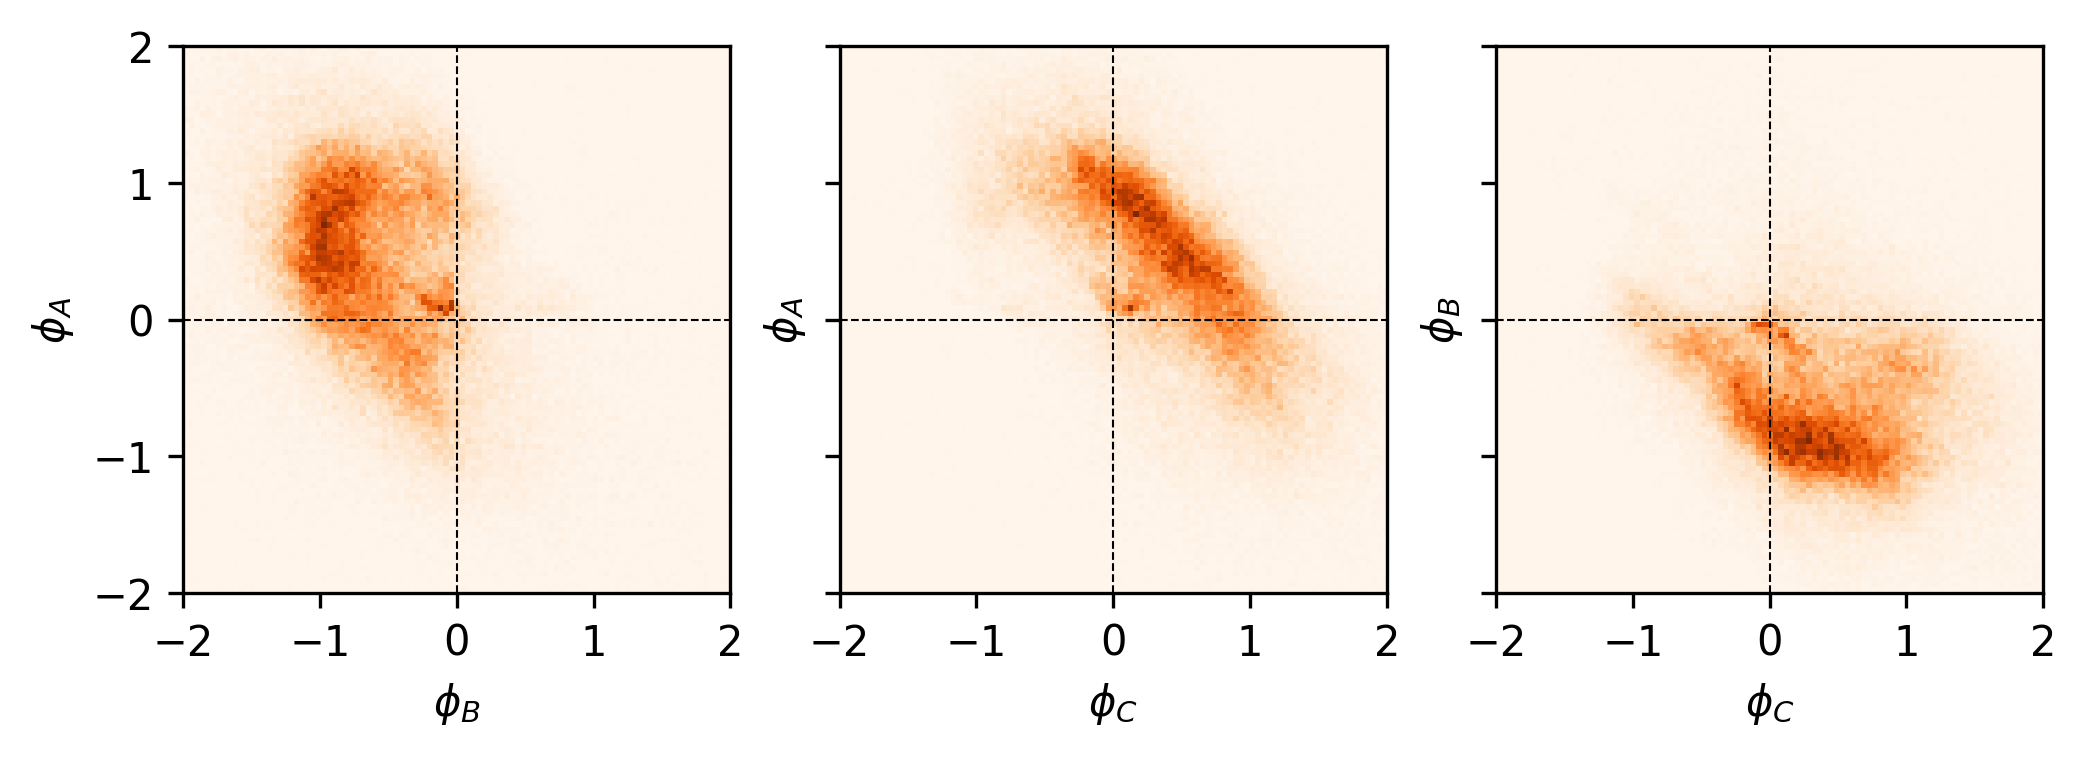

In [26]:
window_size = 3000 # frames, 1 frame = 0.5 s

# colors = plt.cm.get_cmap("tab10")
# video_colors = plt.cm.get_cmap("winter", len(files))

fig, ax = plt.subplots(ncols=3, figsize=(8, 2.7), sharex=True, sharey=True, dpi=300)
fr_list = []
lim = 2

offset = 0
for date in dates:
    folder = os.path.join(main_folder, date, "Flow_rate")
    l = readdata(folder, "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        flowrate["normalizer"] = gaussian_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), sigma=window_size, axis=0)
        maxt = flowrate["t"].max()
        flowrate["t"] += offset
        offset += maxt
        # flowrate = flowrate.loc[flowrate.normalizer>150]
        fr_list.append(flowrate)

combined = pd.concat(fr_list)

for num, i1, i2 in ((0, "A", "B"), (1, "A", "C"), (2, "B", "C")):
    H, xedges, yedges = np.histogram2d(combined[i1]/combined["normalizer"], combined[i2]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
    ax[num].imshow(H, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
    ax[num].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
    ax[num].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
    ax[num].set_xlim([-lim, lim])
    ax[num].set_ylim([-lim, lim])
    ax[num].set_xlabel("$\phi_{}$".format(i2))
    ax[num].set_ylabel("$\phi_{}$".format(i1))

In [20]:
combined

,C,A,B,t,normalizer
0,20.995526,132.084459,-116.456767,0.0,203.701564
1,-22.093515,115.024830,-116.463218,0.5,203.701563
2,-63.521815,103.490881,-103.517636,1.0,203.701558
3,-29.610981,118.076540,-107.727867,1.5,203.701553
4,9.280150,115.139935,-75.151389,2.0,203.701548
...,...,...,...,...,...
3594,11.005038,24.102909,-31.770767,64981.5,269.815323
3595,32.217897,37.551244,-37.761648,64982.0,269.815298
3596,17.113299,21.960888,-30.270226,64982.5,269.815279
3597,12.035426,39.049906,-3.540752,64983.0,269.815270


Text(0, 0.5, '$\\phi$')

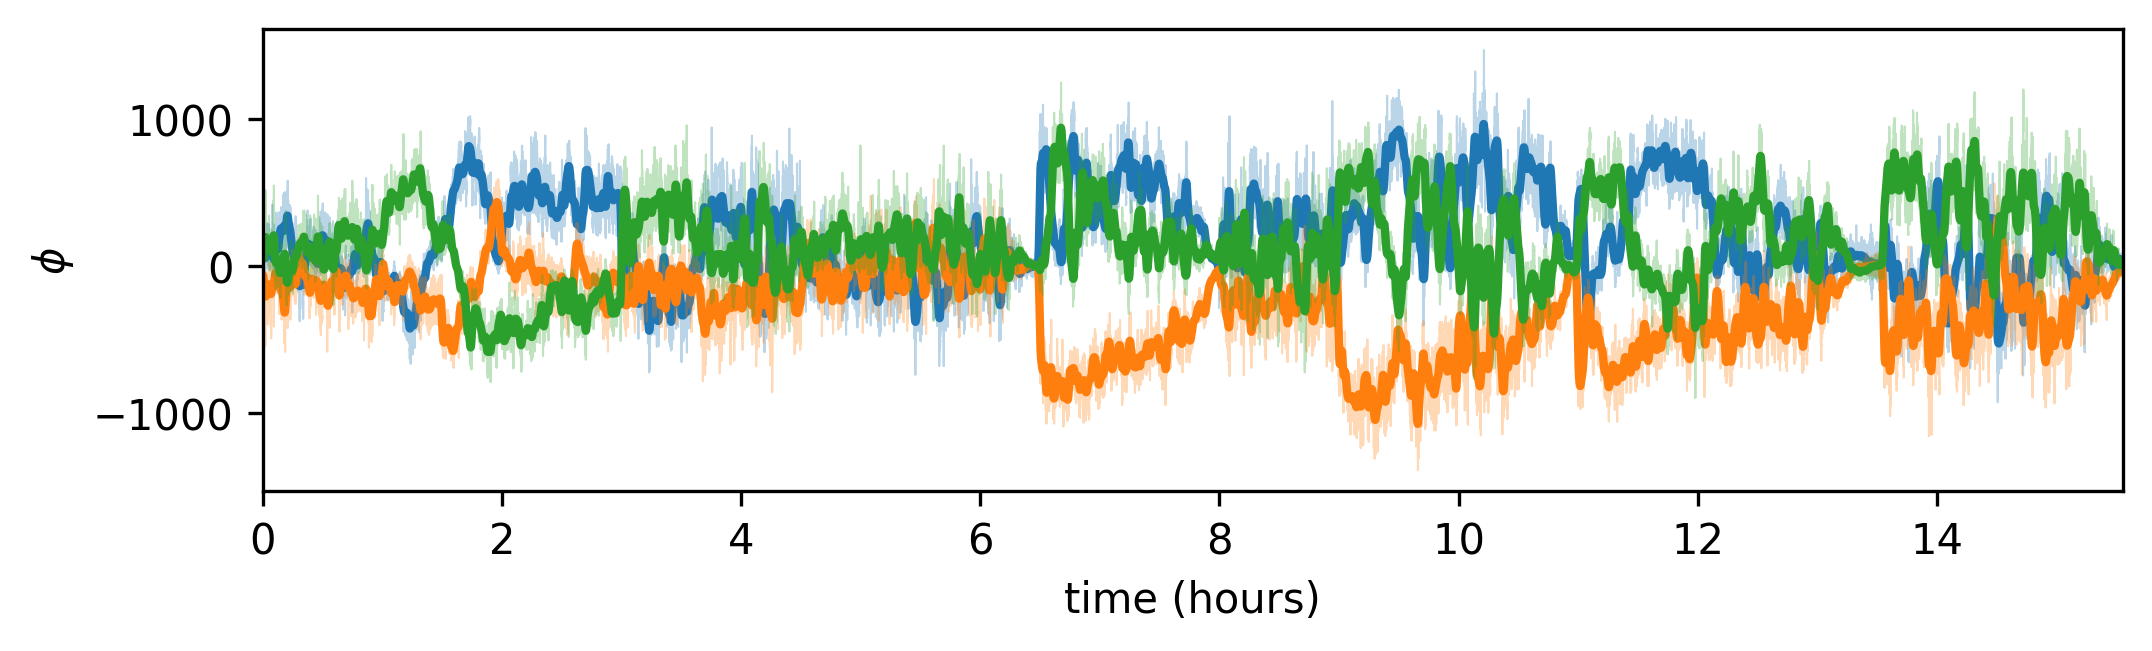

In [25]:
fig, ax = plt.subplots(figsize=(8,2), dpi=300)
colors = plt.get_cmap("tab10")
for i, channel_name in enumerate(["A", "B", "C"]):
    ax.plot(combined["t"]/3600, combined[channel_name], color=colors(i), lw=0.5, alpha=0.3)
    ax.plot(combined["t"]/3600, gaussian_filter1d(combined[channel_name], sigma=50), color=colors(i), lw=2, label=channel_name)
ax.set_xlim([0, combined["t"].max()/3600])
ax.set_xlabel("time (hours)")
ax.set_ylabel("$\phi$")

In [ ]:
fig, ax = plt.subplots(figsize=(8,2), dpi=300)
colors = plt.get_cmap("tab10")
for i, channel_name in enumerate(["A", "B", "C"]):
    ax.plot(combined["t"]/3600, combined[channel_name], color=colors(i), lw=0.5, alpha=0.3)
    ax.plot(combined["t"]/3600, gaussian_filter1d(combined[channel_name], sigma=50), color=colors(i), lw=2, label=channel_name)
ax.set_xlim([0, combined["t"].max()/3600])
ax.set_xlabel("time (hours)")
ax.set_ylabel("$\phi$")

### 1.2 1-panel histogram

A single combination between two channels does not recover the predicted ellipse. It might look better if we superpose all the 3 possible combinations. We will try (A, B), (B, C), (C, A).

NOTE: 

Text(0, 0.5, '$\\phi_1$')

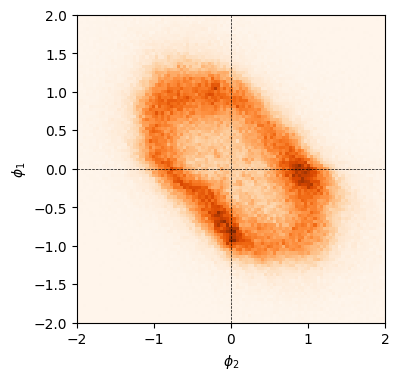

In [20]:
lim = 2
one_panel_list = []
for i1, i2 in (("C", "B"), ("B", "A"), ("A", "C")):
    tmp = pd.DataFrame()
    tmp["phi-1"] = combined[i1] / combined["normalizer"]
    tmp["phi-2"] = combined[i2] / combined["normalizer"]
    one_panel_list.append(tmp)
one_panel = pd.concat(one_panel_list)

fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
H, xedges, yedges = np.histogram2d(one_panel["phi-1"], one_panel["phi-2"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
ax.imshow(H, interpolation='nearest', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])
ax.set_xlabel("$\phi_{}$".format(2))
ax.set_ylabel("$\phi_{}$".format(1))

I'm not sure how legit this "stacking" is. It is clear that the three flow rates are not independent. They must satisfy:

$$
\phi_A + \phi_B + \phi_C = 0
$$

By putting all the possible bifurcation combinations (AB, BC, CA) in the same plot, we add more points to the histogram. For example, if we know 

$$
\phi_A = 1 \\
\phi_B = -1 \\
$$

then, $\phi_C = 0$ must be true.

### 1.3 Day-by-day

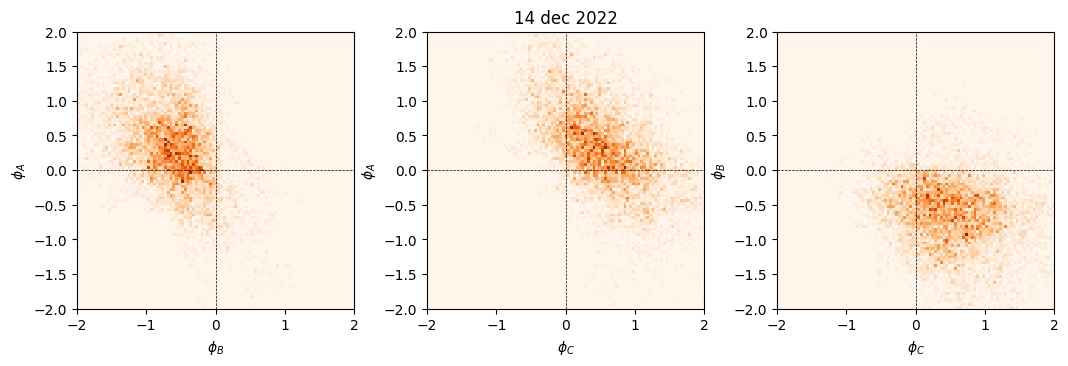

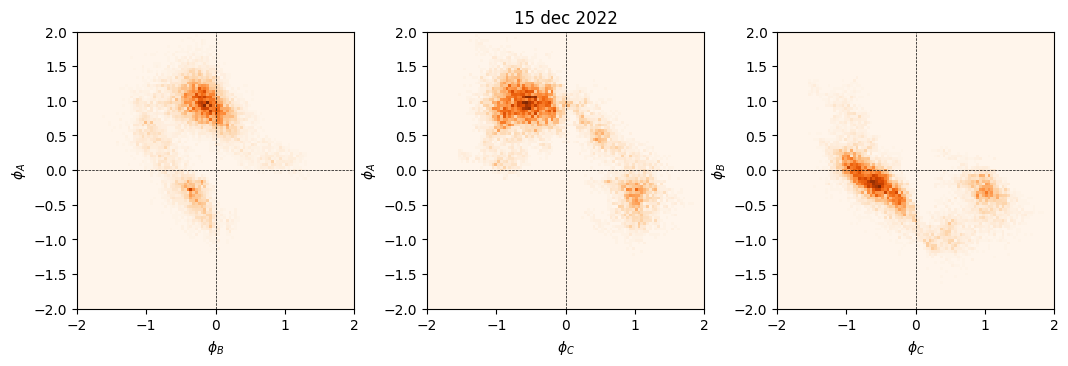

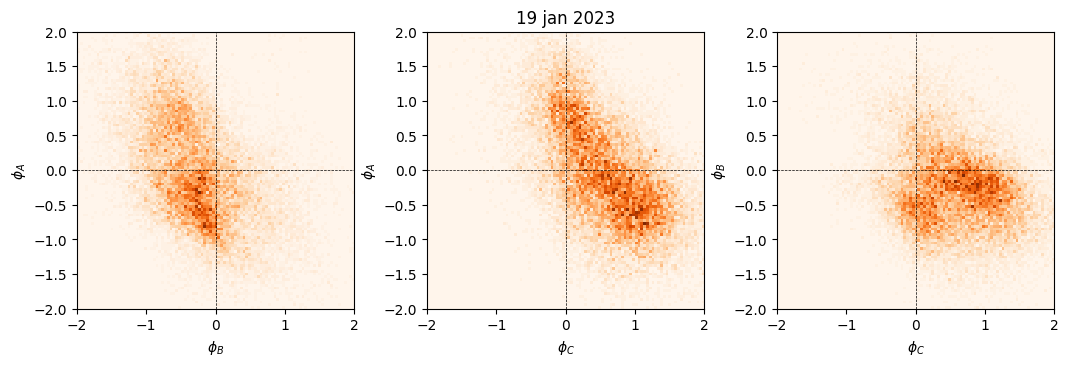

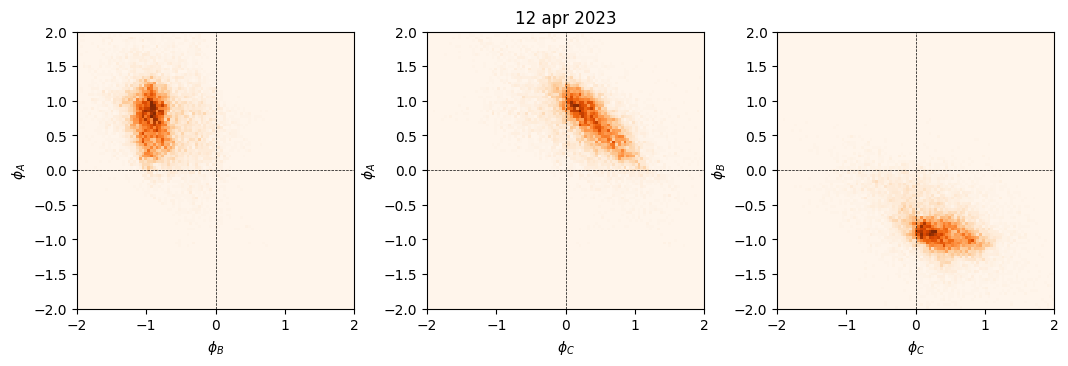

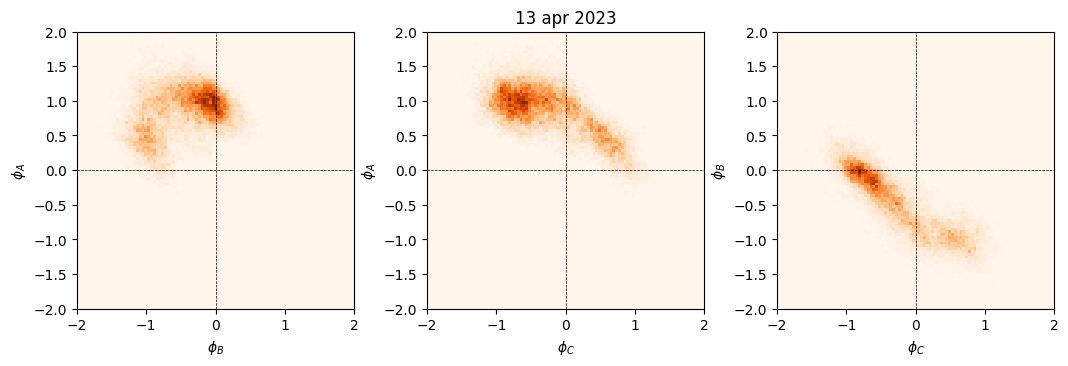

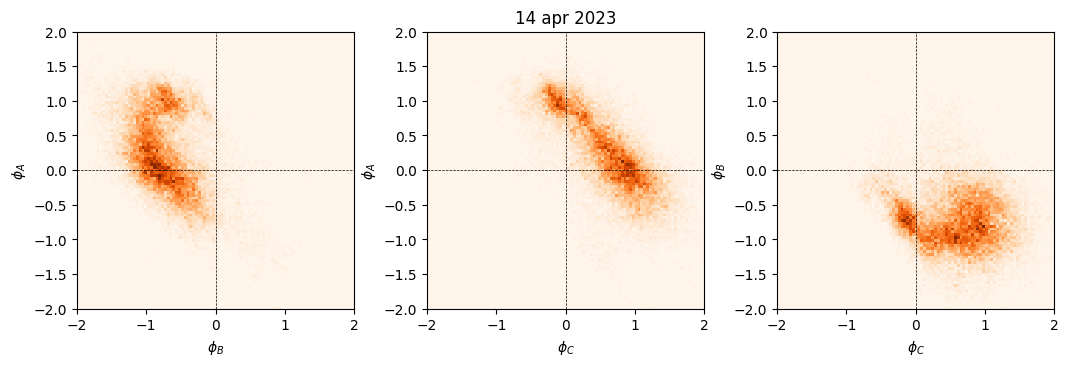

In [11]:
window_size = 1000 # frames, 1 frame = 0.5 s

lim = 2

for date in dates:
    fr_list = []
    folder = os.path.join(main_folder, date, "Flow_rate")
    l = readdata(folder, "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        flowrate["normalizer"] = uniform_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), size=window_size, axis=0)
        flowrate = flowrate.loc[flowrate.normalizer>100]
        fr_list.append(flowrate)

    combined = pd.concat(fr_list)

    fig, ax = plt.subplots(ncols=3, figsize=(12.8, 3.6), dpi=100)
    for num, i1, i2 in ((0, "A", "B"), (1, "A", "C"), (2, "B", "C")):
        H, xedges, yedges = np.histogram2d(combined[i1]/combined["normalizer"], combined[i2]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
        ax[num].imshow(H, interpolation='nearest', origin='lower',
            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
        ax[num].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
        ax[num].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
        ax[num].set_xlim([-lim, lim])
        ax[num].set_ylim([-lim, lim])
        ax[num].set_xlabel("$\phi_{}$".format(i2))
        ax[num].set_ylabel("$\phi_{}$".format(i1))
    ax[1].set_title(date)

## 2 model_02_S

All 3 channels are modified with ratchets. This design is very similar to `model_13` and `model_14`, so we make the same style plots and compare them.

In [4]:
dates = ["31 jan 2023"]
main_folder = "/mnt/bf/SYMMETRIC/"

In [13]:
# some statistics
for date in dates:
    folder = os.path.join(main_folder, date, "Flow_rate")
    l = readdata(folder, "csv")
    total = 0
    fr_list = []
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir).dropna()
        flowrate["normalizer"] = uniform_filter1d(flowrate[flowrate.columns.drop("t")].abs().max(axis=1), size=window_size, axis=0)
        total += len(flowrate)
        fr_list.append(flowrate)
        combined = pd.concat(fr_list)
        nominal_flowrate = combined["normalizer"].mean()
    print("{0:18}: {1:2d} videos, {2:5d} points, {3:7.2f} um^2/s".format(date, num+1, total, nominal_flowrate))

31 jan 2023       :  6 videos, 21594 points,  949.06 um^2/s


/tmp/ipykernel_451701/3260131422.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10")


Text(0, 0.5, '$\\phi$')

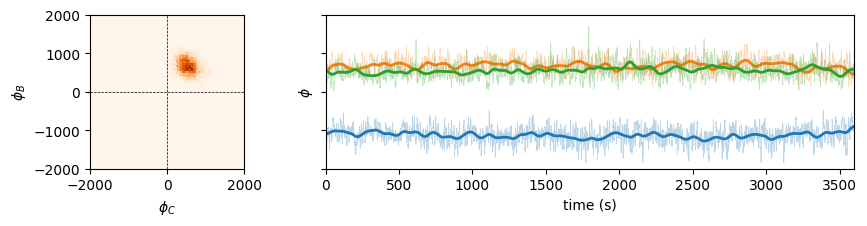

In [112]:
# histogram and flow rate
window_size = 3000 # frames, 1 frame = 0.5 s
main_folder = os.path.join("/mnt/SYMMETRIC/", "31 jan 2023", "Flow_rate")

colors = plt.cm.get_cmap("tab10")

fig, ax = plt.subplots(ncols=2, figsize=(10, 2), width_ratios=(1,3), sharey=True)
fr_list = []
offset = 0
for i in range(3,5):
    flowrate = pd.read_csv(os.path.join(main_folder, "{:02d}.csv".format(i))).dropna()
    flowrate["normalizer"] = gaussian_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), sigma=window_size, axis=0)
    tmp = flowrate["t"].max()
    flowrate["t"] += offset
    offset += tmp
    fr_list.append(flowrate)

combined = pd.concat(fr_list)

lim = combined["normalizer"].mean() // 1000 * 2000
H, xedges, yedges = np.histogram2d(combined["B"], combined["C"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
ax[0].imshow(H, interpolation='nearest', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
ax[0].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax[0].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax[0].set_xlim([-lim, lim])
ax[0].set_ylim([-lim, lim])
ax[0].set_xlabel("$\phi_{}$".format("C"))
ax[0].set_ylabel("$\phi_{}$".format("B"))

for i, channel_name in enumerate(combined.drop(columns=["t", "normalizer"])):
    ax[1].plot(combined["t"], combined[channel_name], color=colors(i), lw=0.5, alpha=0.3)
    ax[1].plot(combined["t"], gaussian_filter1d(combined[channel_name], sigma=50), color=colors(i), lw=2, label=channel_name)
ax[1].set_xlim([0, combined["t"].max()])
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel("$\phi$")
# ax[1].legend(frameon=False, fontsize=8)

/tmp/ipykernel_1974882/2229018963.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10")


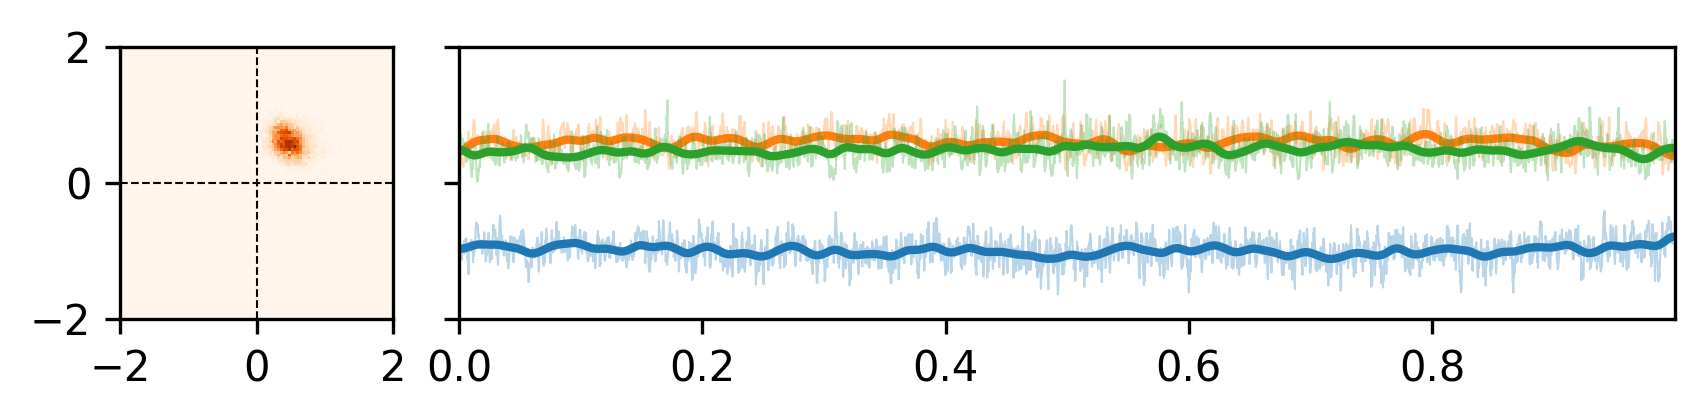

In [6]:
# histogram and flow rate
window_size = 3000 # frames, 1 frame = 0.5 s

colors = plt.cm.get_cmap("tab10")

fig, ax = plt.subplots(ncols=2, figsize=(6, 1.5), width_ratios=(1,3), sharey=True, dpi=300, gridspec_kw={"wspace": 0})
fr_list = []
offset = 0
for date in dates:
    l = readdata(os.path.join(main_folder, date, "Flow_rate"), "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir).dropna()
        flowrate["normalizer"] = gaussian_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), sigma=window_size, axis=0)
        tmp = flowrate["t"].max()
        flowrate["t"] += offset
        offset += tmp
        fr_list.append(flowrate)

combined = pd.concat(fr_list)

lim = 2
H, xedges, yedges = np.histogram2d(combined["B"]/combined["normalizer"], combined["C"]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
ax[0].imshow(H, interpolation='nearest', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
ax[0].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax[0].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax[0].set_xlim([-lim, lim])
ax[0].set_ylim([-lim, lim])
# ax[0].set_xlabel("$\phi_{}$".format("C"))
# ax[0].set_ylabel("$\phi_{}$".format("B"))

for i, channel_name in enumerate(combined.drop(columns=["t", "normalizer"])):
    ax[1].plot(combined["t"]/3600, combined[channel_name]/combined["normalizer"], color=colors(i), lw=0.5, alpha=0.3)
    ax[1].plot(combined["t"]/3600, gaussian_filter1d(combined[channel_name]/combined["normalizer"], sigma=50), color=colors(i), lw=2, label=channel_name)
ax[1].set_xlim([0, combined["t"].max()/3600])
# ax[1].set_xlabel("time (s)")
# ax[1].set_ylabel("$\phi$")
# ax[1].legend(frameon=False, fontsize=8)
plt.tight_layout()

## 3 model_03_S

Ratchet input and straight outputs. This model is very similar to `model_10_S` in spirit, so we combine the two results together.

In [35]:
dates = ["01 feb 2023", "22_january_2022", "26_july_2022", "28 feb 2023", "08 mar 2023"]
main_folder = "/mnt/SYMMETRIC"

In [36]:
# some statistics
for date in dates:
    folder = os.path.join(main_folder, date, "Flow_rate")
    l = readdata(folder, "csv")
    total = 0
    fr_list = []
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir).dropna()
        flowrate["normalizer"] = uniform_filter1d(flowrate[flowrate.columns.drop("t")].abs().max(axis=1), size=window_size, axis=0)
        total += len(flowrate)
        fr_list.append(flowrate)
        combined = pd.concat(fr_list)
        nominal_flowrate = combined["normalizer"].mean()
    print("{0:18}: {1:2d} videos, {2:5d} points, {3:7.2f} um^2/s".format(date, num+1, total, nominal_flowrate))

01 feb 2023       :  9 videos, 29393 points,  980.66 um^2/s
22_january_2022   : 11 videos,  6600 points,  229.60 um^2/s
26_july_2022      : 15 videos,  9000 points,  533.90 um^2/s
28 feb 2023       :  9 videos, 31438 points, 1309.47 um^2/s
08 mar 2023       :  9 videos, 32390 points,  844.04 um^2/s


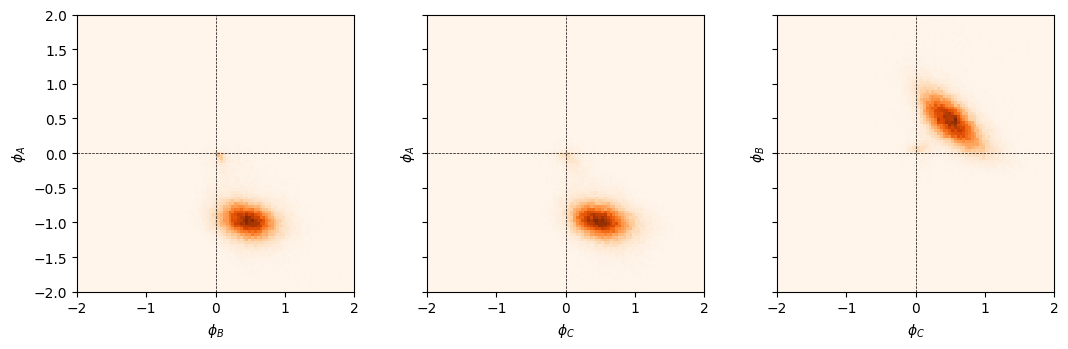

In [41]:
# 3-panel histograms
window_size = 3000 # frames, 1 frame = 0.5 s

fig, ax = plt.subplots(ncols=3, figsize=(12.8, 3.6), dpi=100, sharey=True)
fr_list = []
lim = 2

for date in dates:
    folder = os.path.join(main_folder, date, "Flow_rate")
    l = readdata(folder, "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        flowrate["normalizer"] = gaussian_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), sigma=window_size, axis=0)
        flowrate = flowrate.loc[flowrate.normalizer>100]
        fr_list.append(flowrate)

combined = pd.concat(fr_list)

for num, i1, i2 in ((0, "A", "B"), (1, "A", "C"), (2, "B", "C")):
    H, xedges, yedges = np.histogram2d(combined[i1]/combined["normalizer"], combined[i2]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
    ax[num].imshow(H, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
    ax[num].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
    ax[num].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
    ax[num].set_xlim([-lim, lim])
    ax[num].set_ylim([-lim, lim])
    ax[num].set_xlabel("$\phi_{}$".format(i2))
    ax[num].set_ylabel("$\phi_{}$".format(i1))

## 4 model_04_L

In [19]:
dates = ["22_january_2022", "10_july_2022_E1", "10_july_2022_E2", "20_july_2022", "28_december_2022"]
main_folder = "/mnt/ASYMMETRIC"

In [20]:
# some statistics
window_size = 3000
for date in dates:
    folder = os.path.join(main_folder, date, "Flow_rate")
    l = readdata(folder, "csv")
    total = 0
    fr_list = []
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir).dropna()
        flowrate["normalizer"] = uniform_filter1d(flowrate[flowrate.columns.drop("t")].abs().max(axis=1), size=window_size, axis=0)
        total += len(flowrate)
        fr_list.append(flowrate)
    combined = pd.concat(fr_list)
    nominal_flowrate = combined["normalizer"].mean()
    print("{0:18}: {1:2d} videos, {2:5d} points, {3:7.2f} um^2/s".format(date, num+1, total, nominal_flowrate))

22_january_2022   : 10 videos,  6000 points,  564.19 um^2/s
10_july_2022_E1   : 10 videos,  5719 points,  308.14 um^2/s
10_july_2022_E2   : 13 videos,  7409 points,  385.61 um^2/s
20_july_2022      : 25 videos, 15000 points,  374.74 um^2/s
28_december_2022  :  8 videos,  4800 points,  232.87 um^2/s


/tmp/ipykernel_580302/3448550841.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10")


/mnt/ASYMMETRIC/22_january_2022/Flow_rate/00.csv
/mnt/ASYMMETRIC/22_january_2022/Flow_rate/01.csv
/mnt/ASYMMETRIC/22_january_2022/Flow_rate/02.csv
/mnt/ASYMMETRIC/22_january_2022/Flow_rate/03.csv
/mnt/ASYMMETRIC/22_january_2022/Flow_rate/04.csv
/mnt/ASYMMETRIC/22_january_2022/Flow_rate/05.csv
/mnt/ASYMMETRIC/22_january_2022/Flow_rate/06.csv
/mnt/ASYMMETRIC/22_january_2022/Flow_rate/07.csv
/mnt/ASYMMETRIC/22_january_2022/Flow_rate/08.csv
/mnt/ASYMMETRIC/22_january_2022/Flow_rate/09.csv
/mnt/ASYMMETRIC/10_july_2022_E1/Flow_rate/00.csv
/mnt/ASYMMETRIC/10_july_2022_E1/Flow_rate/01.csv
/mnt/ASYMMETRIC/10_july_2022_E1/Flow_rate/02.csv
/mnt/ASYMMETRIC/10_july_2022_E1/Flow_rate/03.csv
/mnt/ASYMMETRIC/10_july_2022_E1/Flow_rate/04.csv
/mnt/ASYMMETRIC/10_july_2022_E1/Flow_rate/05.csv
/mnt/ASYMMETRIC/10_july_2022_E1/Flow_rate/06.csv
/mnt/ASYMMETRIC/10_july_2022_E1/Flow_rate/07.csv
/mnt/ASYMMETRIC/10_july_2022_E1/Flow_rate/08.csv
/mnt/ASYMMETRIC/10_july_2022_E1/Flow_rate/09.csv
/mnt/ASYMMETRIC/10_j

Text(0, 0.5, '$\\phi$')

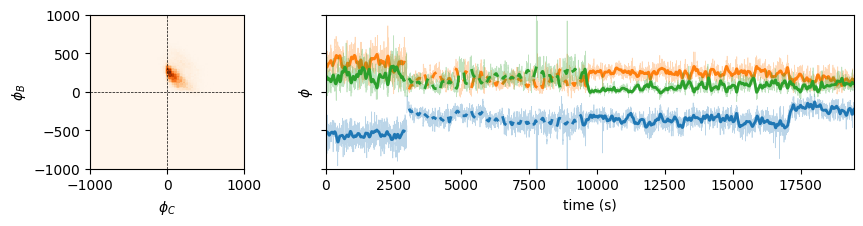

In [26]:
# histogram and flow rate
window_size = 3000 # frames, 1 frame = 0.5 s
main_folder = "/mnt/ASYMMETRIC/"

colors = plt.cm.get_cmap("tab10")

fig, ax = plt.subplots(ncols=2, figsize=(10, 2), width_ratios=(1,3), sharey=True)
fr_list = []
offset = 0
for date in dates:
    l = readdata(os.path.join(main_folder, date, "Flow_rate"), "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        flowrate["normalizer"] = gaussian_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), sigma=window_size, axis=0)
        tmp = flowrate["t"].max()
        flowrate["t"] += offset
        offset += tmp
        fr_list.append(flowrate)

combined = pd.concat(fr_list)

lim = 1000
H, xedges, yedges = np.histogram2d(combined["B"], combined["C"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
ax[0].imshow(H, interpolation='nearest', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
ax[0].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax[0].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax[0].set_xlim([-lim, lim])
ax[0].set_ylim([-lim, lim])
ax[0].set_xlabel("$\phi_{}$".format("C"))
ax[0].set_ylabel("$\phi_{}$".format("B"))

for i, channel_name in enumerate(combined.drop(columns=["t", "normalizer"])):
    ax[1].plot(combined["t"], combined[channel_name], color=colors(i), lw=0.5, alpha=0.3)
    ax[1].plot(combined["t"], gaussian_filter1d(combined[channel_name], sigma=50), color=colors(i), lw=2, label=channel_name)
ax[1].set_xlim([0, combined["t"].max()])
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel("$\phi$")
# ax[1].legend(frameon=False, fontsize=8)

In [22]:
dates

['22_january_2022',
 '10_july_2022_E1',
 '10_july_2022_E2',
 '20_july_2022',
 '28_december_2022']

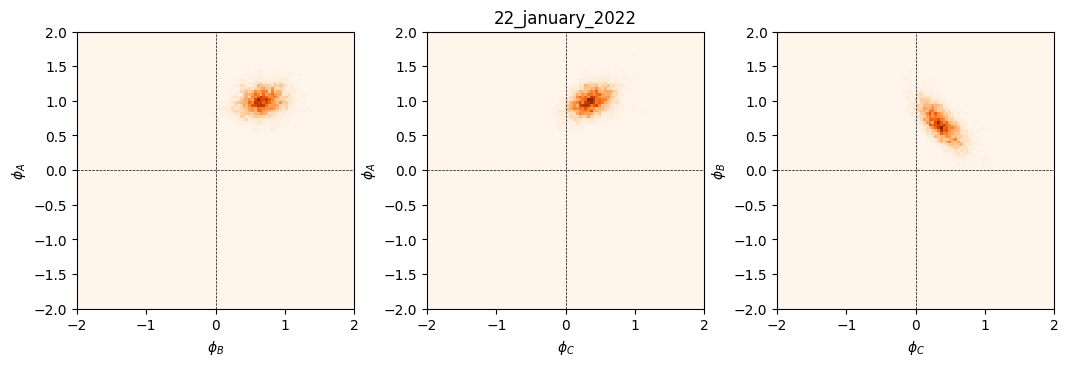

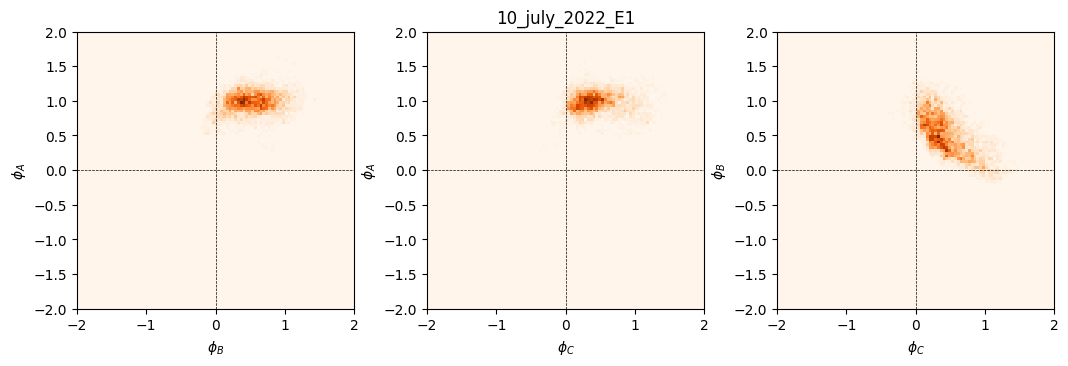

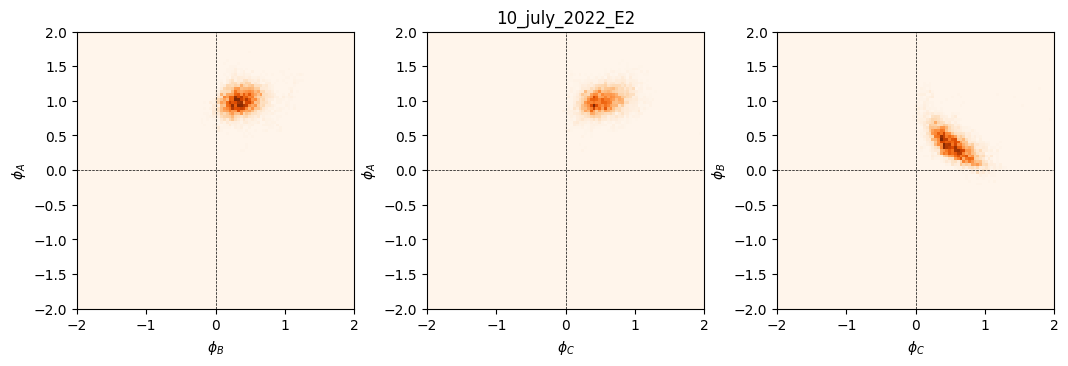

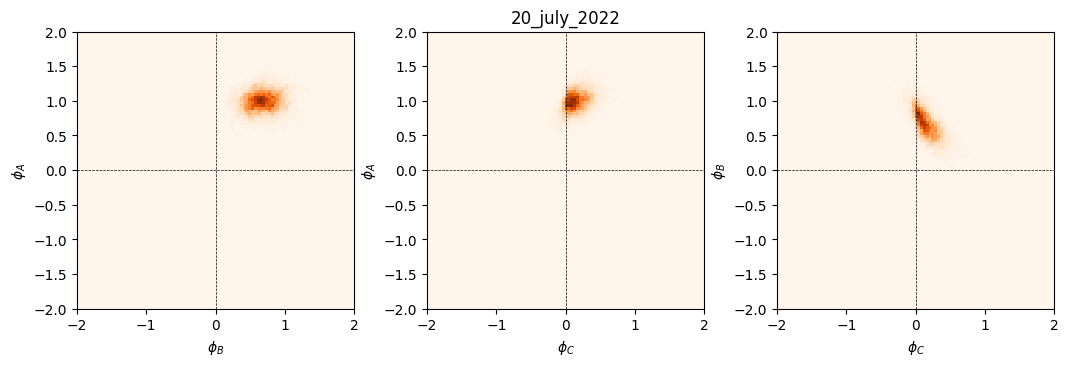

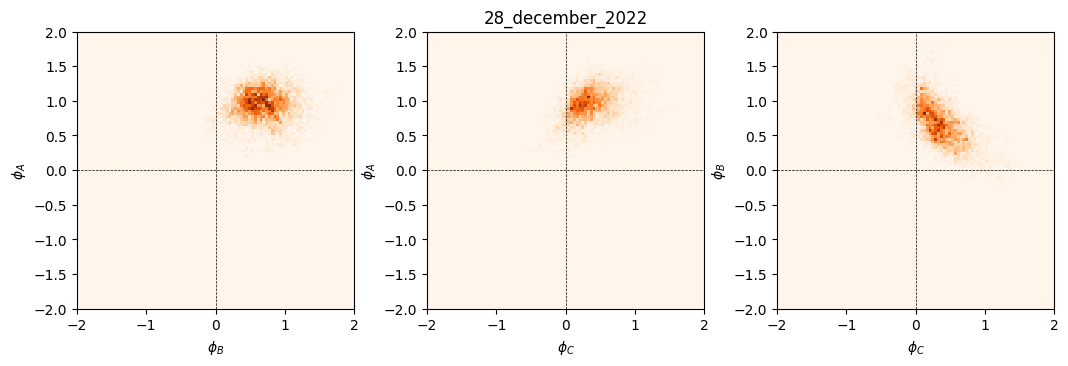

In [61]:
window_size = 50 # frames, 1 frame = 0.5 s

lim = 2

for date in dates:
    fr_list = []
    folder = os.path.join(main_folder, date, "Flow_rate")
    l = readdata(folder, "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir).dropna()
        flowrate["normalizer"] = uniform_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), size=window_size, axis=0)
        flowrate = flowrate.loc[flowrate.normalizer>100]
        fr_list.append(flowrate)

    combined = pd.concat(fr_list)

    fig, ax = plt.subplots(ncols=3, figsize=(12.8, 3.6), dpi=100)
    for num, i1, i2 in ((0, "A", "B"), (1, "A", "C"), (2, "B", "C")):
        H, xedges, yedges = np.histogram2d(combined[i1]/combined["normalizer"], combined[i2]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
        ax[num].imshow(H, interpolation='nearest', origin='lower',
            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
        ax[num].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
        ax[num].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
        ax[num].set_xlim([-lim, lim])
        ax[num].set_ylim([-lim, lim])
        ax[num].set_xlabel("$\phi_{}$".format(i2))
        ax[num].set_ylabel("$\phi_{}$".format(i1))
    ax[1].set_title(date)

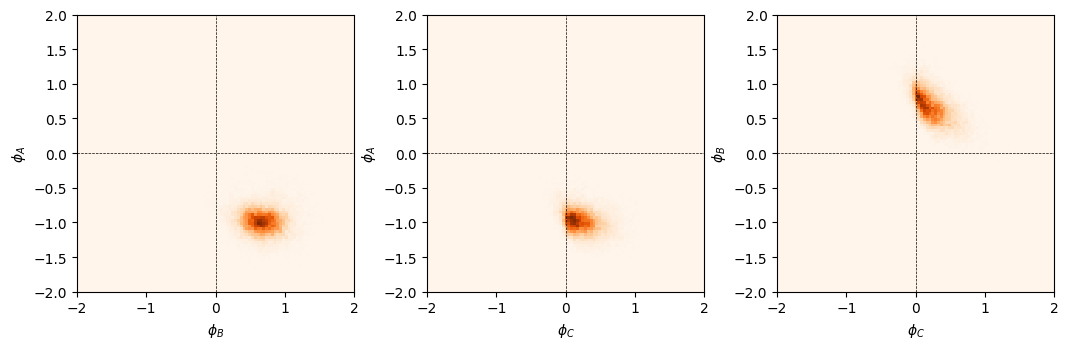

In [7]:
window_size = 50 # frames, 1 frame = 0.5 s


# colors = plt.cm.get_cmap("tab10")
# video_colors = plt.cm.get_cmap("winter", len(files))

fig, ax = plt.subplots(ncols=3, figsize=(12.8, 3.6), dpi=100)
fr_list = []
lim = 2

for date in dates:
    folder = os.path.join("/mnt/ASYMMETRIC", date, "Flow_rate")
    l = readdata(folder, "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        flowrate["normalizer"] = uniform_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), size=window_size, axis=0)
        flowrate = flowrate.loc[flowrate.normalizer>100]
        fr_list.append(flowrate)

combined = pd.concat(fr_list)

for num, i1, i2 in ((0, "A", "B"), (1, "A", "C"), (2, "B", "C")):
    H, xedges, yedges = np.histogram2d(combined[i1]/combined["normalizer"], combined[i2]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
    ax[num].imshow(H, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
    ax[num].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
    ax[num].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
    ax[num].set_xlim([-lim, lim])
    ax[num].set_ylim([-lim, lim])
    ax[num].set_xlabel("$\phi_{}$".format(i2))
    ax[num].set_ylabel("$\phi_{}$".format(i1))

NOTE: This data currently does not comply with the new positive direction definition!

## 5 model_05_L

Ratchet input, with straight outputs of different lengths. This design is very similar to `model_12_L` in spirit, so we combine the results together.

In [7]:
dates = ["22_january_2022", "10_july_2022_E1", "10_july_2022_E2", "20_july_2022", "28_december_2022", "23 feb 2023", "24 feb 2023", "03 mar 2023"]
main_folder = "/mnt/bf/ASYMMETRIC"

In [43]:
# some statistics
for date in dates:
    folder = os.path.join(main_folder, date, "Flow_rate")
    l = readdata(folder, "csv")
    total = 0
    fr_list = []
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir).dropna()
        flowrate["normalizer"] = uniform_filter1d(flowrate[flowrate.columns.drop("t")].abs().max(axis=1), size=window_size, axis=0)
        total += len(flowrate)
        fr_list.append(flowrate)
        combined = pd.concat(fr_list)
        nominal_flowrate = combined["normalizer"].mean()
    print("{0:18}: {1:2d} videos, {2:5d} points, {3:7.2f} um^2/s".format(date, num+1, total, nominal_flowrate))

23 feb 2023       :  6 videos, 19459 points,  145.26 um^2/s
24 feb 2023       :  8 videos, 23816 points,  609.80 um^2/s
03 mar 2023       : 12 videos, 43188 points, 1263.90 um^2/s


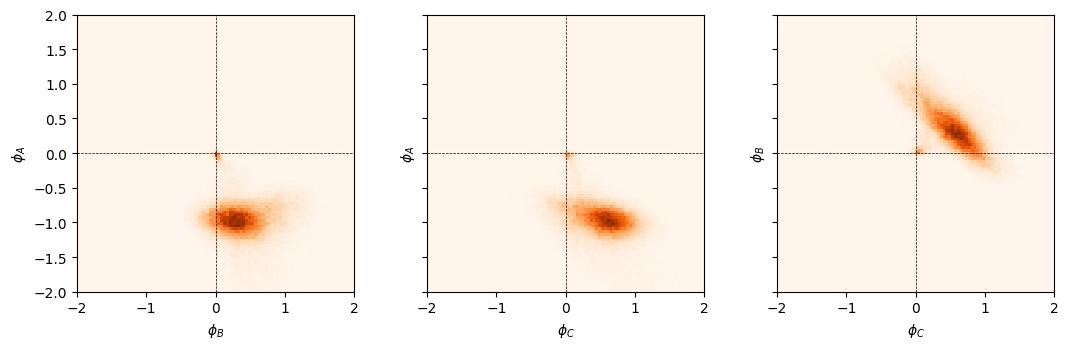

In [45]:
# 3-panel histograms
window_size = 3000 # frames, 1 frame = 0.5 s

fig, ax = plt.subplots(ncols=3, figsize=(12.8, 3.6), dpi=100, sharey=True)
fr_list = []
lim = 2

for date in dates:
    folder = os.path.join(main_folder, date, "Flow_rate")
    l = readdata(folder, "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        flowrate["normalizer"] = gaussian_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), sigma=window_size, axis=0)
        flowrate = flowrate.loc[flowrate.normalizer>100]
        fr_list.append(flowrate)

combined = pd.concat(fr_list)

for num, i1, i2 in ((0, "A", "B"), (1, "A", "C"), (2, "B", "C")):
    H, xedges, yedges = np.histogram2d(combined[i1]/combined["normalizer"], combined[i2]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
    ax[num].imshow(H, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
    ax[num].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
    ax[num].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
    ax[num].set_xlim([-lim, lim])
    ax[num].set_ylim([-lim, lim])
    ax[num].set_xlabel("$\phi_{}$".format(i2))
    ax[num].set_ylabel("$\phi_{}$".format(i1))

Text(0, 0.5, '$\\phi_B$')

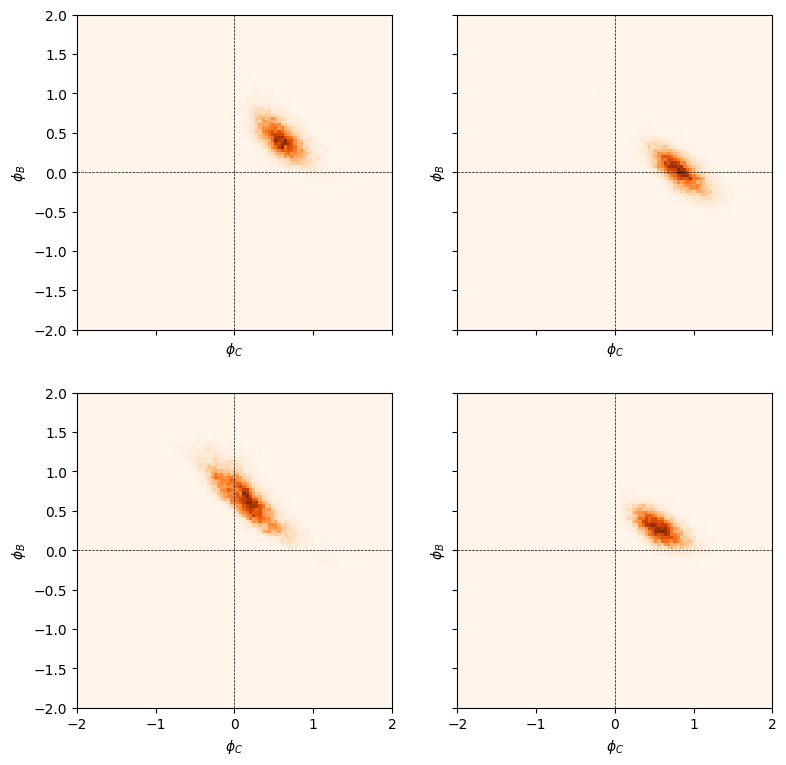

In [53]:
window_size = 3000
fig, ax = plt.subplots(2, 2, figsize=(9,9), sharex=True, sharey=True)

ax1 = ax[0][0]

date = "03 mar 2023"
folder = os.path.join(main_folder, date, "Flow_rate")

fr_list = []
for i in range(2, 6):
    flowrate = pd.read_csv(os.path.join(folder, "{:02d}.csv".format(i)))
    flowrate["normalizer"] = gaussian_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), sigma=window_size, axis=0)
    flowrate = flowrate.loc[flowrate.normalizer>100]
    fr_list.append(flowrate)
combined = pd.concat(fr_list)
H, xedges, yedges = np.histogram2d(combined["B"]/combined["normalizer"], combined["C"]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
ax1.imshow(H, interpolation='nearest', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
ax1.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax1.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax1.set_xlim([-lim, lim])
ax1.set_ylim([-lim, lim])
ax1.set_xlabel("$\phi_{}$".format("C"))
ax1.set_ylabel("$\phi_{}$".format("B"))

ax2 = ax[0][1]
fr_list = []
for i in range(7, 12):
    flowrate = pd.read_csv(os.path.join(folder, "{:02d}.csv".format(i)))
    flowrate["normalizer"] = gaussian_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), sigma=window_size, axis=0)
    flowrate = flowrate.loc[flowrate.normalizer>100]
    fr_list.append(flowrate)
combined = pd.concat(fr_list)
H, xedges, yedges = np.histogram2d(combined["B"]/combined["normalizer"], combined["C"]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
ax2.imshow(H, interpolation='nearest', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
ax2.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax2.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax2.set_xlim([-lim, lim])
ax2.set_ylim([-lim, lim])
ax2.set_xlabel("$\phi_{}$".format("C"))
ax2.set_ylabel("$\phi_{}$".format("B"))

date = "23 feb 2023"
folder = os.path.join(main_folder, date, "Flow_rate")

ax3 = ax[1][0]
fr_list = []
for i in range(6):
    flowrate = pd.read_csv(os.path.join(folder, "{:02d}.csv".format(i)))
    flowrate["normalizer"] = gaussian_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), sigma=window_size, axis=0)
    flowrate = flowrate.loc[flowrate.normalizer>100]
    fr_list.append(flowrate)
combined = pd.concat(fr_list)
H, xedges, yedges = np.histogram2d(combined["B"]/combined["normalizer"], combined["C"]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
ax3.imshow(H, interpolation='nearest', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
ax3.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax3.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax3.set_xlim([-lim, lim])
ax3.set_ylim([-lim, lim])
ax3.set_xlabel("$\phi_{}$".format("C"))
ax3.set_ylabel("$\phi_{}$".format("B"))

date = "24 feb 2023"
folder = os.path.join(main_folder, date, "Flow_rate")

ax4 = ax[1][1]
fr_list = []
for i in range(3):
    flowrate = pd.read_csv(os.path.join(folder, "{:02d}.csv".format(i)))
    flowrate["normalizer"] = gaussian_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), sigma=window_size, axis=0)
    flowrate = flowrate.loc[flowrate.normalizer>100]
    fr_list.append(flowrate)
combined = pd.concat(fr_list)
H, xedges, yedges = np.histogram2d(combined["B"]/combined["normalizer"], combined["C"]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
ax4.imshow(H, interpolation='nearest', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
ax4.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax4.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax4.set_xlim([-lim, lim])
ax4.set_ylim([-lim, lim])
ax4.set_xlabel("$\phi_{}$".format("C"))
ax4.set_ylabel("$\phi_{}$".format("B"))

/tmp/ipykernel_1974882/2229018963.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10")


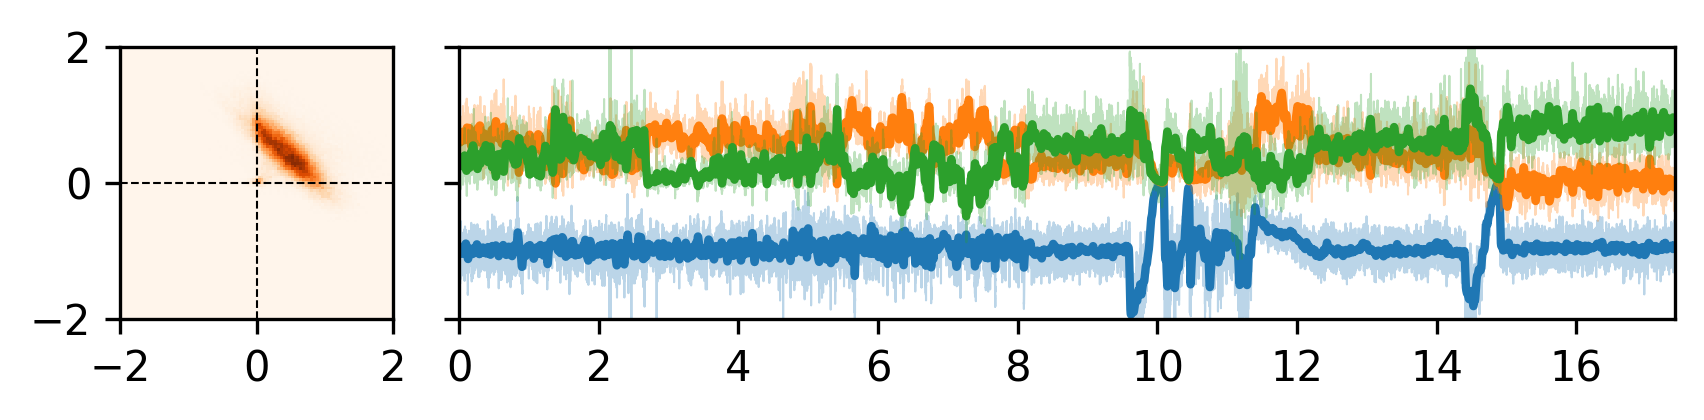

In [8]:
# histogram and flow rate
window_size = 3000 # frames, 1 frame = 0.5 s

colors = plt.cm.get_cmap("tab10")

fig, ax = plt.subplots(ncols=2, figsize=(6, 1.5), width_ratios=(1,3), sharey=True, dpi=300, gridspec_kw={"wspace": 0})
fr_list = []
offset = 0
for date in dates:
    l = readdata(os.path.join(main_folder, date, "Flow_rate"), "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir).dropna()
        flowrate["normalizer"] = gaussian_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), sigma=window_size, axis=0)
        tmp = flowrate["t"].max()
        flowrate["t"] += offset
        offset += tmp
        fr_list.append(flowrate)

combined = pd.concat(fr_list)

lim = 2
H, xedges, yedges = np.histogram2d(combined["B"]/combined["normalizer"], combined["C"]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
ax[0].imshow(H, interpolation='nearest', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
ax[0].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax[0].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax[0].set_xlim([-lim, lim])
ax[0].set_ylim([-lim, lim])
# ax[0].set_xlabel("$\phi_{}$".format("C"))
# ax[0].set_ylabel("$\phi_{}$".format("B"))

for i, channel_name in enumerate(combined.drop(columns=["t", "normalizer"])):
    ax[1].plot(combined["t"]/3600, combined[channel_name]/combined["normalizer"], color=colors(i), lw=0.5, alpha=0.3)
    ax[1].plot(combined["t"]/3600, gaussian_filter1d(combined[channel_name]/combined["normalizer"], sigma=50), color=colors(i), lw=2, label=channel_name)
ax[1].set_xlim([0, combined["t"].max()/3600])
# ax[1].set_xlabel("time (s)")
# ax[1].set_ylabel("$\phi$")
# ax[1].legend(frameon=False, fontsize=8)
plt.tight_layout()

## 6 model_06_L

In [2]:
dates = ["07 feb 2023"]
main_folder = "/mnt/ASYMMETRIC"

In [4]:
# some statistics
window_size = 3000
for date in dates:
    folder = os.path.join(main_folder, date, "Flow_rate")
    l = readdata(folder, "csv")
    total = 0
    fr_list = []
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir).dropna()
        flowrate["normalizer"] = uniform_filter1d(flowrate[flowrate.columns.drop("t")].abs().max(axis=1), size=window_size, axis=0)
        total += len(flowrate)
        fr_list.append(flowrate)
    combined = pd.concat(fr_list)
    nominal_flowrate = combined["normalizer"].mean()
    print("{0:18}: {1:2d} videos, {2:5d} points, {3:7.2f} um^2/s".format(date, num+1, total, nominal_flowrate))

07 feb 2023       :  9 videos, 30050 points,  624.41 um^2/s


/tmp/ipykernel_583833/3680608140.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10")


Text(0, 0.5, '$\\phi$')

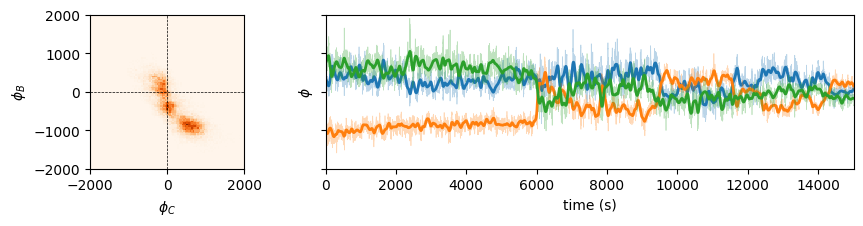

In [6]:
# histogram and flow rate
window_size = 3000 # frames, 1 frame = 0.5 s
main_folder = os.path.join("/mnt/ASYMMETRIC/", "07 feb 2023", "Flow_rate")

colors = plt.cm.get_cmap("tab10")

fig, ax = plt.subplots(ncols=2, figsize=(10, 2), width_ratios=(1,3), sharey=True)
fr_list = []
offset = 0
for i in range(9):
    flowrate = pd.read_csv(os.path.join(main_folder, "{:02d}.csv".format(i))).dropna()
    flowrate["normalizer"] = gaussian_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), sigma=window_size, axis=0)
    tmp = flowrate["t"].max()
    flowrate["t"] += offset
    offset += tmp
    fr_list.append(flowrate)

combined = pd.concat(fr_list)

lim = 2000
H, xedges, yedges = np.histogram2d(combined["B"], combined["C"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
ax[0].imshow(H, interpolation='nearest', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
ax[0].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax[0].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax[0].set_xlim([-lim, lim])
ax[0].set_ylim([-lim, lim])
ax[0].set_xlabel("$\phi_{}$".format("C"))
ax[0].set_ylabel("$\phi_{}$".format("B"))

for i, channel_name in enumerate(combined.drop(columns=["t", "normalizer"])):
    ax[1].plot(combined["t"], combined[channel_name], color=colors(i), lw=0.5, alpha=0.3)
    ax[1].plot(combined["t"], gaussian_filter1d(combined[channel_name], sigma=50), color=colors(i), lw=2, label=channel_name)
ax[1].set_xlim([0, combined["t"].max()])
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel("$\phi$")
# ax[1].legend(frameon=False, fontsize=8)

## 7 model_07_A (angle)

In [28]:
dates = ["08 feb 2023"]
main_folder = "/mnt/bf/ASYMMETRIC"

In [114]:
# some statistics
for date in dates:
    folder = os.path.join(main_folder, date, "Flow_rate")
    l = readdata(folder, "csv")
    total = 0
    fr_list = []
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir).dropna()
        flowrate["normalizer"] = uniform_filter1d(flowrate[flowrate.columns.drop("t")].abs().max(axis=1), size=window_size, axis=0)
        total += len(flowrate)
        fr_list.append(flowrate)
    combined = pd.concat(fr_list)
    nominal_flowrate = combined["normalizer"].mean()
    print("{0:18}: {1:2d} videos, {2:5d} points, {3:7.2f} um^2/s".format(date, num+1, total, nominal_flowrate))

08 feb 2023       : 14 videos, 49268 points,  534.50 um^2/s


/tmp/ipykernel_1974882/1070032067.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10")


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/bf/ASYMMETRIC/00.csv'

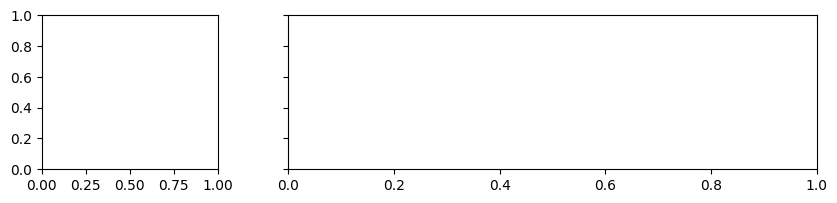

In [29]:
/3600# histogram and flow rate
window_size = 3000 # frames, 1 frame = 0.5 s

colors = plt.cm.get_cmap("tab10")

fig, ax = plt.subplots(ncols=2, figsize=(10, 2), width_ratios=(1,3), sharey=True)
fr_list = []
offset = 0
for i in range(5):
    flowrate = pd.read_csv(os.path.join(main_folder, "{:02d}.csv".format(i))).dropna()
    flowrate["normalizer"] = gaussian_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), sigma=window_size, axis=0)
    tmp = flowrate["t"].max()
    flowrate["t"] += offset
    offset += tmp
    fr_list.append(flowrate)

combined = pd.concat(fr_list)

lim = 1000
H, xedges, yedges = np.histogram2d(combined["B"], combined["C"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
ax[0].imshow(H, interpolation='nearest', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
ax[0].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax[0].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax[0].set_xlim([-lim, lim])
ax[0].set_ylim([-lim, lim])
ax[0].set_xlabel("$\phi_{}$".format("C"))
ax[0].set_ylabel("$\phi_{}$".format("B"))

for i, channel_name in enumerate(combined.drop(columns=["t", "normalizer"])):
    ax[1].plot(combined["t"], combined[channel_name], color=colors(i), lw=0.5, alpha=0.3)
    ax[1].plot(combined["t"], gaussian_filter1d(combined[channel_name], sigma=50), color=colors(i), lw=2, label=channel_name)
ax[1].set_xlim([0, combined["t"].max()])
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel("$\phi$")
ax[1].legend(frameon=False, fontsize=8)

/tmp/ipykernel_1974882/2229018963.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10")


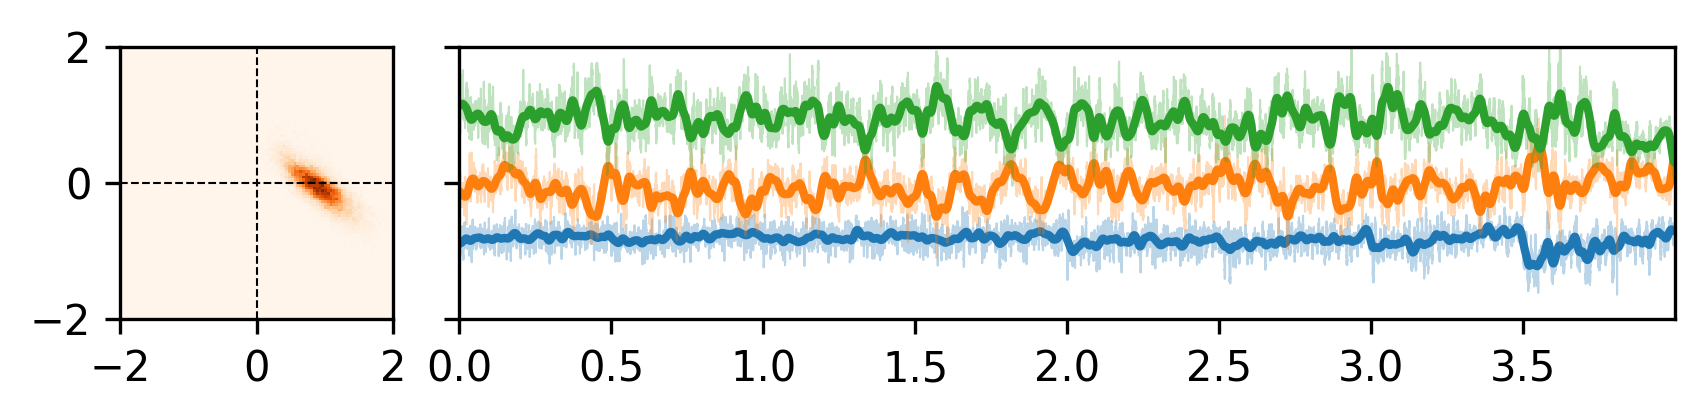

In [30]:
# histogram and flow rate
window_size = 3000 # frames, 1 frame = 0.5 s

colors = plt.cm.get_cmap("tab10")

fig, ax = plt.subplots(ncols=2, figsize=(6, 1.5), width_ratios=(1,3), sharey=True, dpi=300, gridspec_kw={"wspace": 0})
fr_list = []
offset = 0
for date in dates:
    l = readdata(os.path.join(main_folder, date, "Flow_rate"), "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir).dropna()
        flowrate["normalizer"] = gaussian_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), sigma=window_size, axis=0)
        tmp = flowrate["t"].max()
        flowrate["t"] += offset
        offset += tmp
        fr_list.append(flowrate)

combined = pd.concat(fr_list)

lim = 2
H, xedges, yedges = np.histogram2d(combined["B"]/combined["normalizer"], combined["C"]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
ax[0].imshow(H, interpolation='nearest', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
ax[0].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax[0].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax[0].set_xlim([-lim, lim])
ax[0].set_ylim([-lim, lim])
# ax[0].set_xlabel("$\phi_{}$".format("C"))
# ax[0].set_ylabel("$\phi_{}$".format("B"))

for i, channel_name in enumerate(combined.drop(columns=["t", "normalizer"])):
    ax[1].plot(combined["t"]/3600, combined[channel_name]/combined["normalizer"], color=colors(i), lw=0.5, alpha=0.3)
    ax[1].plot(combined["t"]/3600, gaussian_filter1d(combined[channel_name]/combined["normalizer"], sigma=50), color=colors(i), lw=2, label=channel_name)
ax[1].set_xlim([0, combined["t"].max()/3600])
# ax[1].set_xlabel("time (s)")
# ax[1].set_ylabel("$\phi$")
# ax[1].legend(frameon=False, fontsize=8)
plt.tight_layout()

## 9 model_09_A

In [20]:
dates = ["10 feb 2023"]
main_folder = "/mnt/bf/ASYMMETRIC"

In [6]:
# some statistics
window_size = 3000
for date in dates:
    folder = os.path.join(main_folder, "10 feb 2023", "Flow_rate")
    l = readdata(folder, "csv")
    total = 0
    fr_list = []
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir).dropna()
        flowrate["normalizer"] = uniform_filter1d(flowrate[flowrate.columns.drop("t")].abs().max(axis=1), size=window_size, axis=0)
        total += len(flowrate)
        fr_list.append(flowrate)
    combined = pd.concat(fr_list)
    nominal_flowrate = combined["normalizer"].mean()
    print("{0:18}: {1:2d} videos, {2:5d} points, {3:7.2f} um^2/s".format(date, num+1, total, nominal_flowrate))

10 feb 2023       :  5 videos, 17995 points,  394.54 um^2/s


/tmp/ipykernel_577401/715554577.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10")


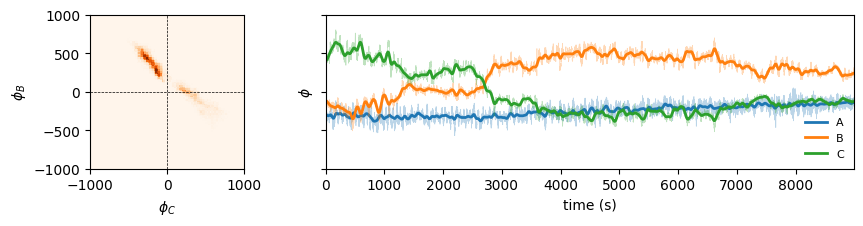

In [7]:
# histogram and flow rate
window_size = 3000 # frames, 1 frame = 0.5 s
main_folder = os.path.join("/mnt/ASYMMETRIC/", "10 feb 2023", "Flow_rate")

colors = plt.cm.get_cmap("tab10")

fig, ax = plt.subplots(ncols=2, figsize=(10, 2), width_ratios=(1,3), sharey=True)
fr_list = []
offset = 0
for i in range(5):
    flowrate = pd.read_csv(os.path.join(main_folder, "{:02d}.csv".format(i))).dropna()
    flowrate["normalizer"] = gaussian_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), sigma=window_size, axis=0)
    tmp = flowrate["t"].max()
    flowrate["t"] += offset
    offset += tmp
    fr_list.append(flowrate)

combined = pd.concat(fr_list)

lim = 1000
H, xedges, yedges = np.histogram2d(combined["B"], combined["C"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
ax[0].imshow(H, interpolation='nearest', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
ax[0].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax[0].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax[0].set_xlim([-lim, lim])
ax[0].set_ylim([-lim, lim])
ax[0].set_xlabel("$\phi_{}$".format("C"))
ax[0].set_ylabel("$\phi_{}$".format("B"))

for i, channel_name in enumerate(combined.drop(columns=["t", "normalizer"])):
    ax[1].plot(combined["t"], combined[channel_name], color=colors(i), lw=0.5, alpha=0.3)
    ax[1].plot(combined["t"], gaussian_filter1d(combined[channel_name], sigma=50), color=colors(i), lw=2, label=channel_name)
ax[1].set_xlim([0, combined["t"].max()])
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel("$\phi$")
ax[1].legend(frameon=False, fontsize=8)

Text(0.5, 1.0, 'model_09')

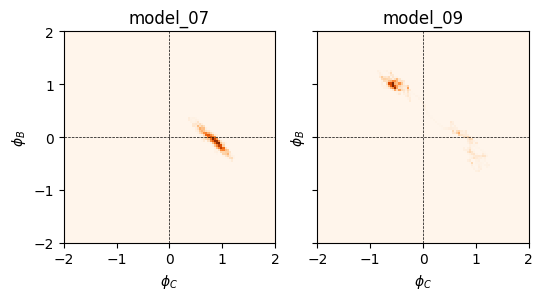

In [35]:
# model 07 and 09 normalized histogram

window_size = 300

fig, ax = plt.subplots(ncols=2, figsize=(6,3), sharex=True, sharey=True)

fr_list = []
offset = 0
for i in range(5, 14):
    flowrate = pd.read_csv(os.path.join("/mnt/ASYMMETRIC/08 feb 2023/Flow_rate", "{:02d}.csv".format(i))).dropna()
    flowrate["normalizer"] = gaussian_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), sigma=window_size, axis=0)
    tmp = flowrate["t"].max()
    flowrate["t"] += offset
    offset += tmp
    fr_list.append(flowrate)

combined = pd.concat(fr_list)
combined[["A", "B", "C"]] = gaussian_filter1d(combined[["A", "B", "C"]], sigma=50, axis=0)

lim = 2
H, xedges, yedges = np.histogram2d(combined["B"]/combined["normalizer"], combined["C"]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
ax[0].imshow(H, interpolation='nearest', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
ax[0].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax[0].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax[0].set_xlim([-lim, lim])
ax[0].set_ylim([-lim, lim])
ax[0].set_xlabel("$\phi_{}$".format("C"))
ax[0].set_ylabel("$\phi_{}$".format("B"))
ax[0].set_title("model_07")

fr_list = []
offset = 0
for i in range(5):
    flowrate = pd.read_csv(os.path.join("/mnt/ASYMMETRIC/10 feb 2023/Flow_rate", "{:02d}.csv".format(i))).dropna()
    flowrate["normalizer"] = gaussian_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), sigma=window_size, axis=0)
    tmp = flowrate["t"].max()
    flowrate["t"] += offset
    offset += tmp
    fr_list.append(flowrate)

combined = pd.concat(fr_list)
combined[["A", "B", "C"]] = gaussian_filter1d(combined[["A", "B", "C"]], sigma=50, axis=0)

lim = 2
H, xedges, yedges = np.histogram2d(combined["B"]/combined["normalizer"], combined["C"]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
ax[1].imshow(H, interpolation='nearest', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
ax[1].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax[1].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax[1].set_xlim([-lim, lim])
ax[1].set_ylim([-lim, lim])
ax[1].set_xlabel("$\phi_{}$".format("C"))
ax[1].set_ylabel("$\phi_{}$".format("B"))
ax[1].set_title("model_09")

/tmp/ipykernel_1974882/2229018963.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10")


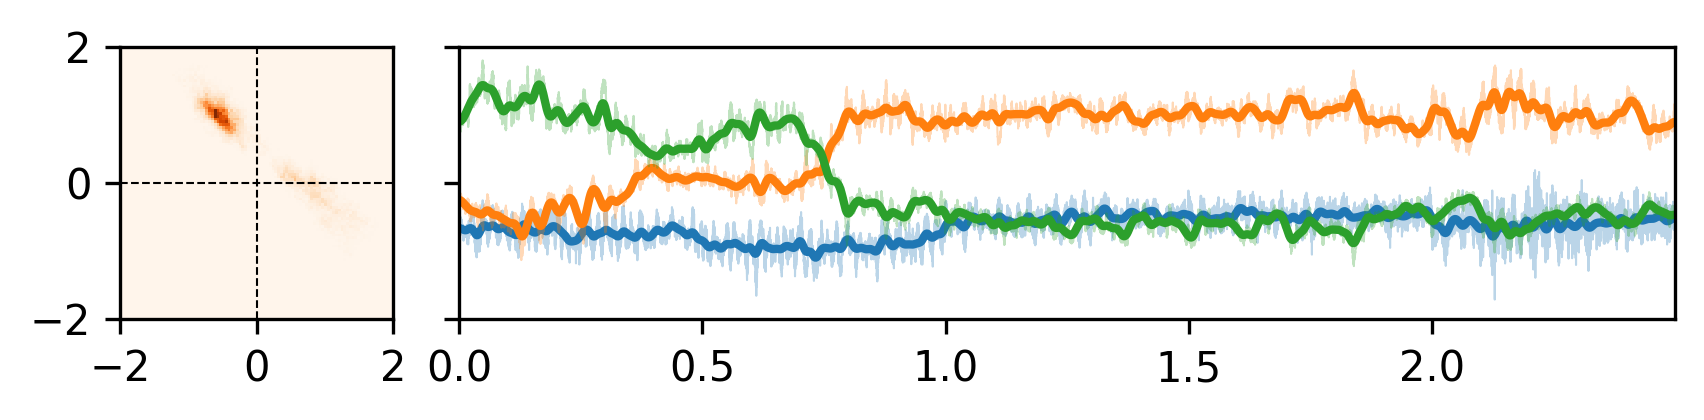

In [21]:
# histogram and flow rate
window_size = 3000 # frames, 1 frame = 0.5 s

colors = plt.cm.get_cmap("tab10")

fig, ax = plt.subplots(ncols=2, figsize=(6, 1.5), width_ratios=(1,3), sharey=True, dpi=300, gridspec_kw={"wspace": 0})
fr_list = []
offset = 0
for date in dates:
    l = readdata(os.path.join(main_folder, date, "Flow_rate"), "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir).dropna()
        flowrate["normalizer"] = gaussian_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), sigma=window_size, axis=0)
        tmp = flowrate["t"].max()
        flowrate["t"] += offset
        offset += tmp
        fr_list.append(flowrate)

combined = pd.concat(fr_list)

lim = 2
H, xedges, yedges = np.histogram2d(combined["B"]/combined["normalizer"], combined["C"]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
ax[0].imshow(H, interpolation='nearest', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
ax[0].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax[0].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax[0].set_xlim([-lim, lim])
ax[0].set_ylim([-lim, lim])
# ax[0].set_xlabel("$\phi_{}$".format("C"))
# ax[0].set_ylabel("$\phi_{}$".format("B"))

for i, channel_name in enumerate(combined.drop(columns=["t", "normalizer"])):
    ax[1].plot(combined["t"]/3600, combined[channel_name]/combined["normalizer"], color=colors(i), lw=0.5, alpha=0.3)
    ax[1].plot(combined["t"]/3600, gaussian_filter1d(combined[channel_name]/combined["normalizer"], sigma=50), color=colors(i), lw=2, label=channel_name)
ax[1].set_xlim([0, combined["t"].max()/3600])
# ax[1].set_xlabel("time (s)")
# ax[1].set_ylabel("$\phi$")
# ax[1].legend(frameon=False, fontsize=8)
plt.tight_layout()

## 13 model_13_L

In [23]:
dates = ["01 mar 2023"]
main_folder = "/mnt/bf/ASYMMETRIC"

/tmp/ipykernel_1974882/2229018963.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10")


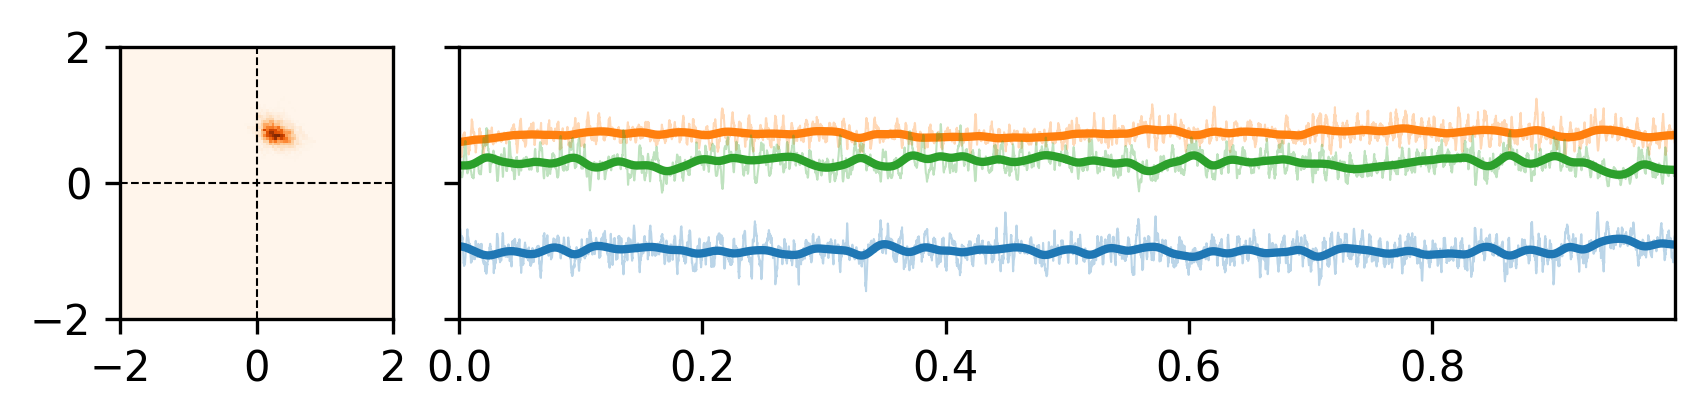

In [24]:
# histogram and flow rate
window_size = 3000 # frames, 1 frame = 0.5 s

colors = plt.cm.get_cmap("tab10")

fig, ax = plt.subplots(ncols=2, figsize=(6, 1.5), width_ratios=(1,3), sharey=True, dpi=300, gridspec_kw={"wspace": 0})
fr_list = []
offset = 0
for date in dates:
    l = readdata(os.path.join(main_folder, date, "Flow_rate"), "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir).dropna()
        flowrate["normalizer"] = gaussian_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), sigma=window_size, axis=0)
        tmp = flowrate["t"].max()
        flowrate["t"] += offset
        offset += tmp
        fr_list.append(flowrate)

combined = pd.concat(fr_list)

lim = 2
H, xedges, yedges = np.histogram2d(combined["B"]/combined["normalizer"], combined["C"]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
ax[0].imshow(H, interpolation='nearest', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
ax[0].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax[0].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax[0].set_xlim([-lim, lim])
ax[0].set_ylim([-lim, lim])
# ax[0].set_xlabel("$\phi_{}$".format("C"))
# ax[0].set_ylabel("$\phi_{}$".format("B"))

for i, channel_name in enumerate(combined.drop(columns=["t", "normalizer"])):
    ax[1].plot(combined["t"]/3600, combined[channel_name]/combined["normalizer"], color=colors(i), lw=0.5, alpha=0.3)
    ax[1].plot(combined["t"]/3600, gaussian_filter1d(combined[channel_name]/combined["normalizer"], sigma=50), color=colors(i), lw=2, label=channel_name)
ax[1].set_xlim([0, combined["t"].max()/3600])
# ax[1].set_xlabel("time (s)")
# ax[1].set_ylabel("$\phi$")
# ax[1].legend(frameon=False, fontsize=8)
plt.tight_layout()

## 14 model_14_L

In [25]:
dates = ["02 mar 2023"]
main_folder = "/mnt/bf/ASYMMETRIC"

/tmp/ipykernel_1974882/2229018963.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10")


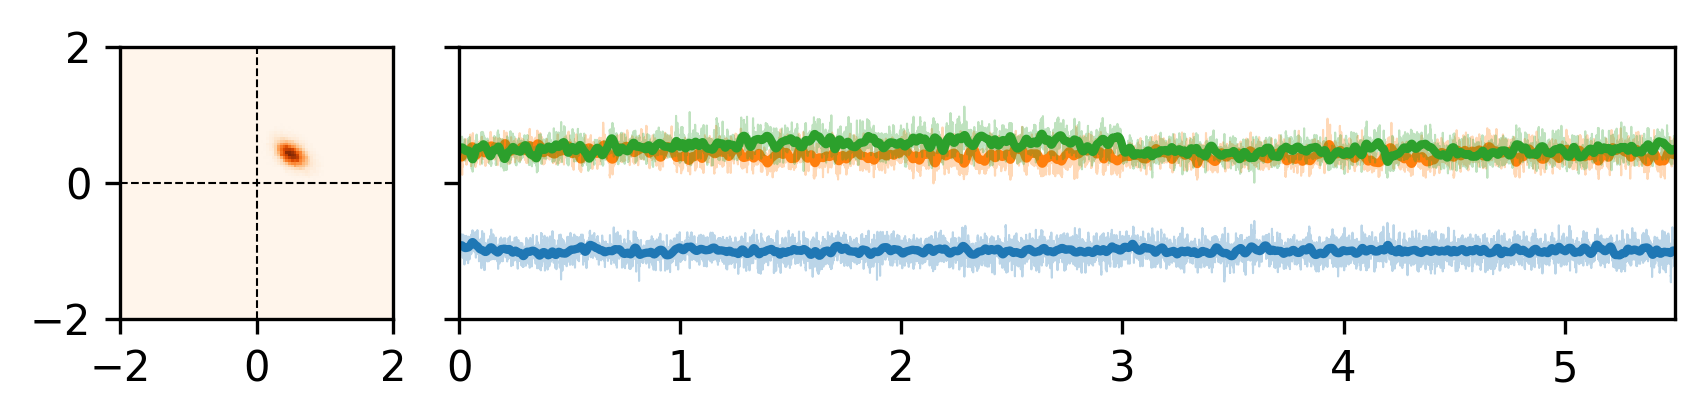

In [27]:
# histogram and flow rate
window_size = 3000 # frames, 1 frame = 0.5 s

colors = plt.cm.get_cmap("tab10")

fig, ax = plt.subplots(ncols=2, figsize=(6, 1.5), width_ratios=(1,3), sharey=True, dpi=300, gridspec_kw={"wspace": 0})
fr_list = []
offset = 0
for date in dates:
    l = readdata(os.path.join(main_folder, date, "Flow_rate"), "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir).dropna()
        flowrate["normalizer"] = gaussian_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), sigma=window_size, axis=0)
        tmp = flowrate["t"].max()
        flowrate["t"] += offset
        offset += tmp
        fr_list.append(flowrate)

combined = pd.concat(fr_list)

lim = 2
H, xedges, yedges = np.histogram2d(combined["B"]/combined["normalizer"], combined["C"]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
ax[0].imshow(H, interpolation='nearest', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
ax[0].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax[0].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax[0].set_xlim([-lim, lim])
ax[0].set_ylim([-lim, lim])
# ax[0].set_xlabel("$\phi_{}$".format("C"))
# ax[0].set_ylabel("$\phi_{}$".format("B"))

for i, channel_name in enumerate(combined.drop(columns=["t", "normalizer"])):
    ax[1].plot(combined["t"]/3600, combined[channel_name]/combined["normalizer"], color=colors(i), lw=0.5, alpha=0.3)
    ax[1].plot(combined["t"]/3600, gaussian_filter1d(combined[channel_name]/combined["normalizer"], sigma=50), color=colors(i), lw=2, label=channel_name)
ax[1].set_xlim([0, combined["t"].max()/3600])
# ax[1].set_xlabel("time (s)")
# ax[1].set_ylabel("$\phi$")
# ax[1].legend(frameon=False, fontsize=8)
plt.tight_layout()

## Appendix

## A. Nominal activity of samples

The activity of AN samples is not necessarily a constant due to varying temperature, motor concentration. We do observe very different activity in different experiments, ranging from 100 to 1500 um^2/s in terms of flow rate in channels. It is not clear so far how activity influences the flows. Specifically, does it affect the "noise"? does it affect the energy for turning an angle? 

These questions can possibly be answered if we have a nominal activity for each sample. For simplicity, I will start with "each day of experiment".

In [23]:
window_size = 50
folder = r"A:\SYMMETRIC"

dates = next(os.walk(folder))[1]
nominal_flowrate_list = []
for date in dates:
    fr_folder = os.path.join(folder, date, "Flow_rate")
    fr_list = []
    if os.path.exists(fr_folder):
        l = readdata(fr_folder, "csv")
        for num, i in l.iterrows():
            flowrate = pd.read_csv(i.Dir)
            flowrate["normalizer"] = uniform_filter1d(flowrate[flowrate.columns.drop("t")].abs().max(axis=1), size=window_size, axis=0)
            fr_list.append(flowrate)
        combined = pd.concat(fr_list)
        nominal_flowrate = combined["normalizer"].mean()
        nominal_flowrate_list.append(nominal_flowrate)
        print("{0:18} | {1:8.02f} um^2/s".format(date, nominal_flowrate))            

01 feb 2023        |   857.07 um^2/s
04 nov 2022        |   214.67 um^2/s
05_july_2022       |   122.58 um^2/s
07 nov 2022        |    48.12 um^2/s
14 dec 2022        |   141.52 um^2/s
15 dec 2022        |   305.43 um^2/s
17 jan 2023        |   209.92 um^2/s
17 oct 2022        |  1301.85 um^2/s
19 jan 2023        |   174.40 um^2/s
22_january_2022    |   229.56 um^2/s
26_july_2022       |   533.87 um^2/s
28_december_2022   |   149.36 um^2/s
31 jan 2023        |   949.06 um^2/s
31 oct 2022        |   142.00 um^2/s


In [28]:
window_size = 50
folder = r"A:\ASYMMETRIC"

dates = next(os.walk(folder))[1]
nominal_flowrate_list = []
for date in dates:
    fr_folder = os.path.join(folder, date, "Flow_rate")
    fr_list = []
    if os.path.exists(fr_folder):
        l = readdata(fr_folder, "csv")
        for num, i in l.iterrows():
            flowrate = pd.read_csv(i.Dir).dropna()
            flowrate["normalizer"] = uniform_filter1d(flowrate[flowrate.columns.drop("t")].abs().max(axis=1), size=window_size, axis=0)
            fr_list.append(flowrate)
        combined = pd.concat(fr_list)
        nominal_flowrate = combined["normalizer"].mean()
        nominal_flowrate_list.append(nominal_flowrate)
        print("{0:18} | {1:8.02f} um^2/s".format(date, nominal_flowrate))   

07 feb 2023        |   417.95 um^2/s
08 feb 2023        |   534.55 um^2/s
10 feb 2023        |   260.45 um^2/s
10_july_2022_E1    |   308.12 um^2/s
10_july_2022_E2    |   385.62 um^2/s
20_july_2022       |   374.74 um^2/s
22_january_2022    |   564.18 um^2/s
23 feb 2023        |   145.26 um^2/s
24 feb 2023        |   499.28 um^2/s
28_december_2022   |   232.91 um^2/s
